## Objective :

To predict which customer is more likely to purchase the newly introduced telecom plan.

## The Plan

We will be developing 2 models: Logistic Regression with Regularization and Deep Neural Network techniques for this problem and compare them and their performances. We will be picking the model that suits the problem better and gives a more accurate outcome. We will try to uncover the reasons why a model gives more accurate results.


## Data Structure

### Customer Details

| Entity             | Explanation                                               |
|--------------------|-----------------------------------------------------------|
| CustomerID         | Unique customer ID                                        |
| PlanTaken          | Plan Purchase (0: No, 1: Yes)                             |
| Age                | Age of customer                                           |
| TypeofContact      | Contact Type (Company Invited or Self Inquiry)             |
| CityTier           | City Tier (Tier 1 > Tier 2 > Tier 3)                       |
| Occupation         | Occupation of customer                                    |
| Gender             | Gender of customer                                        |
| NumberOfPersons    | Number of persons for the plan (Friends and Family)        |
| PreferredServiceStar| Preferred service rating by customer                       |
| MaritalStatus      | Marital status of customer                                |
| NumberOfUpgrades   | Average number of upgrades in a year                       |
| iPhone             | Has iPhone (0: No, 1: Yes)                                |
| PhoneContract      | Has contracted phone (0: No, 1: Yes)                       |
| NumberOfChildren   | Number of children for the plan                            |
| Designation        | Customer's designation in the current organization        |
| MonthlyIncome      | Gross monthly income of the customer                       |


### Customer Interaction Data

| Entity                  | Explanation                                           |
|-------------------------|-------------------------------------------------------|
| PitchSatisfactionScore  | Satisfaction with the sales pitch (1-5 scale)         |
| PlanPitched             | Plan proposed by the salesperson                       |
| NumberOfFollowups      | Total follow-ups conducted after the sales pitch       |
| DurationOfPitch         | Duration of the sales pitch to the customer             |


## Models

# Reference :- Code exercises provided by Prof. Bhavik Gandhi in the previous lectures on Loyalist College moodle site.

## 1. Logistic Regression

### Importing all important libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

### Data Preprocessing and loading for LR

#### Reading the data

In [ ]:
tel=pd.read_csv(r"/content/Telecome.csv")

In [ ]:
# coping the data into another dataframe to work
dataframe = tel

In [ ]:
# viewing the data head and tail
dataframe.head()

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
dataframe.tail()

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
# Checking the data shape
dataframe.shape

(4888, 20)

#### Checking the datatypes of all the attributes

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4637 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4843 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4862 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4748 non-null   float64
 14  iPhone                  4888 non-null   

#### The dataset contains null values in the Age, DurationOfPitch, NumberOfFollowups, PreferredServiceStar, NumberOfUpgrades, NumberOfChildren, MonthlyIncome

In [ ]:
# To handle the null values we are dropping the null value column

dataframe.dropna(subset=['Age', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredServiceStar', 'NumberOfUpgrades', 'NumberOfChildren', 'MonthlyIncome'], inplace=True)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4128 non-null   int64  
 1   PlanTaken               4128 non-null   int64  
 2   Age                     4128 non-null   float64
 3   TypeofContact           4128 non-null   object 
 4   CityTier                4128 non-null   int64  
 5   DurationOfPitch         4128 non-null   float64
 6   Occupation              4128 non-null   object 
 7   Gender                  4128 non-null   object 
 8   NumberOfPersons         4128 non-null   int64  
 9   NumberOfFollowups       4128 non-null   float64
 10  PlanPitched             4128 non-null   object 
 11  PreferredServiceStar    4128 non-null   float64
 12  MaritalStatus           4128 non-null   object 
 13  NumberOfUpgrades        4128 non-null   float64
 14  iPhone                  4128 non-null   

In [ ]:
dataframe.isnull().sum()

CustomerID                0
PlanTaken                 0
Age                       0
TypeofContact             0
CityTier                  0
DurationOfPitch           0
Occupation                0
Gender                    0
NumberOfPersons           0
NumberOfFollowups         0
PlanPitched               0
PreferredServiceStar      0
MaritalStatus             0
NumberOfUpgrades          0
iPhone                    0
PitchSatisfactionScore    0
PhoneContract             0
NumberOfChildren          0
Designation               0
MonthlyIncome             0
dtype: int64

In [ ]:
dataframe.describe()

,CustomerID,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,MonthlyIncome
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.0000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,202527.763808,0.193072,37.231831,1.663275,15.584787,2.949370,3.741521,3.578488,3.2953,0.295300,3.060804,0.612161,1.223595,23178.464147
std,1409.439133,0.394757,9.174521,0.920640,8.398142,0.718818,1.006786,0.795031,1.8563,0.456233,1.363064,0.487317,0.852685,4506.614622
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.0000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201320.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.0000,0.000000,2.000000,0.000000,1.000000,20751.000000
50%,202603.500000,0.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.0000,0.000000,3.000000,1.000000,1.000000,22418.000000
75%,203748.250000,0.000000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.0000,1.000000,4.000000,1.000000,2.000000,25301.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.0000,1.000000,5.000000,1.000000,3.000000,98678.000000


#### Removing the unwanted column from dataframe

In [ ]:
dataframe.drop('Designation',axis='columns', inplace=True)
dataframe.drop('CustomerID',axis='columns', inplace=True)
dataframe.drop('iPhone',axis='columns', inplace=True)
dataframe.drop('PhoneContract',axis='columns', inplace=True)

#### Fixing the data types
TypeofContact,Occupation, Gender, PlanPitched, MaritalStatus and Designation are of object type, we can change them to categories.

In [ ]:
dataframe['TypeofContact'] = pd.Categorical(dataframe['TypeofContact'])
dataframe['Gender'] = pd.Categorical(dataframe['Gender'])
dataframe['Occupation'] = pd.Categorical(dataframe['Occupation'])
dataframe['PlanPitched'] = pd.Categorical(dataframe['PlanPitched'])
dataframe['MaritalStatus'] = pd.Categorical(dataframe['MaritalStatus'])

In [ ]:
dataframe.describe(include=['category'])

,TypeofContact,Occupation,Gender,PlanPitched,MaritalStatus
count,4128,4128,4128,4128,4128
unique,2,4,3,5,4
top,Self Enquiry,Salaried,Male,Basic,Married
freq,2918,1999,2463,1615,1990


In [ ]:
# Coverting the categorial
dataframe = pd.get_dummies(dataframe, sparse=True,drop_first=True)

In [ ]:
dataframe.head()

,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,PitchSatisfactionScore,NumberOfChildren,...,Occupation_Small Business,Gender_Female,Gender_Male,PlanPitched_Deluxe,PlanPitched_King,PlanPitched_Standard,PlanPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,1,41.0,3,6.0,3,3.0,3.0,1.0,2,0.0,...,0,1,0,1,0,0,0,0,1,0
1,0,49.0,1,14.0,3,4.0,4.0,2.0,3,2.0,...,0,0,1,1,0,0,0,0,0,0
2,1,37.0,1,8.0,3,4.0,3.0,7.0,3,0.0,...,0,0,1,0,0,0,0,0,1,0
3,0,33.0,1,9.0,2,3.0,3.0,2.0,5,1.0,...,0,1,0,0,0,0,0,0,0,0
5,0,32.0,1,8.0,3,3.0,3.0,1.0,5,1.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
# get the target data

In [ ]:
y = dataframe['PlanTaken']
X = dataframe.drop(['PlanTaken'], axis = 1)

In [ ]:
X.head()

,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,PitchSatisfactionScore,NumberOfChildren,MonthlyIncome,...,Occupation_Small Business,Gender_Female,Gender_Male,PlanPitched_Deluxe,PlanPitched_King,PlanPitched_Standard,PlanPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,41.0,3,6.0,3,3.0,3.0,1.0,2,0.0,20993.0,...,0,1,0,1,0,0,0,0,1,0
1,49.0,1,14.0,3,4.0,4.0,2.0,3,2.0,20130.0,...,0,0,1,1,0,0,0,0,0,0
2,37.0,1,8.0,3,4.0,3.0,7.0,3,0.0,17090.0,...,0,0,1,0,0,0,0,0,1,0
3,33.0,1,9.0,2,3.0,3.0,2.0,5,1.0,17909.0,...,0,1,0,0,0,0,0,0,0,0
5,32.0,1,8.0,3,3.0,3.0,1.0,5,1.0,18068.0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
X.shape

(4128, 23)

In [ ]:
X.isnull().sum()

Age                           0
CityTier                      0
DurationOfPitch               0
NumberOfPersons               0
NumberOfFollowups             0
PreferredServiceStar          0
NumberOfUpgrades              0
PitchSatisfactionScore        0
NumberOfChildren              0
MonthlyIncome                 0
TypeofContact_Self Enquiry    0
Occupation_Large Business     0
Occupation_Salaried           0
Occupation_Small Business     0
Gender_Female                 0
Gender_Male                   0
PlanPitched_Deluxe            0
PlanPitched_King              0
PlanPitched_Standard          0
PlanPitched_Super Deluxe      0
MaritalStatus_Married         0
MaritalStatus_Single          0
MaritalStatus_Unmarried       0
dtype: int64

### Model Building for LR

In [ ]:
# Splitting dataframe into training and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(2889, 23) (1239, 23)


#### l2 refer regulaziation

In [ ]:
# crating the logistic regession model
logreg = LogisticRegression(penalty='l2', random_state=21)

In [ ]:
# train the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=21)

In [ ]:
# make prediction on the test data
y_perdiction = logreg.predict(X_test)

In [ ]:
print(f'Accuracy: {logmodel.score(X, y):.3f}')


Accuracy: 0.822


In [ ]:
#calculate AUC_score
y_prob = logreg.predict_log_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC_Score:{auc_score}")

AUC_Score:0.6907949790794978


In [ ]:
# Perform cross-validation with stratified k-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=cv, scoring='accuracy')

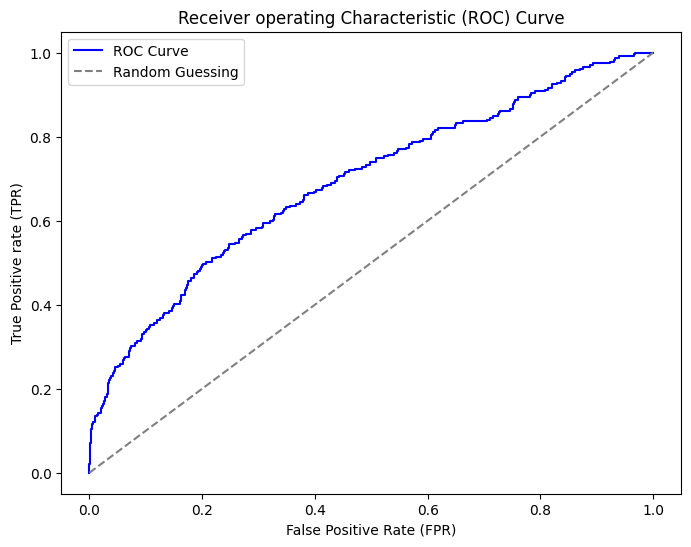

In [ ]:
#plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive rate (TPR)')
plt.title('Receiver operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Model Tunning for LR

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# create logistic regression_model
logreg = LogisticRegression(random_state=21)

In [ ]:
# define hyperparameter and possible values
param_grid = { 'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'C': np.logspace(-4, 4, 20),
               'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
               }

In [ ]:
clf = GridSearchCV(logreg, param_grid= param_grid, cv= 5, verbose=True, n_jobs=1, )

In [ ]:
best_clf = clf.fit(X,y)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, random_state=21, solver='newton-cg')

In [ ]:
print(f'Accuracy: {logmodel.score(X, y):.3f}')

Accuracy: 0.822


In [ ]:
# prediction for test set using above find result the best model
y_perdiction = best_clf.predict(X_test)

#### No major change in accuracy

In [ ]:
# evaluate the model
conf_matrix = confusion_matrix(y_test, y_perdiction)
class_report = classification_report(y_test, y_perdiction)
print("Confusion matrix:")
print("conf_matrix")
print("Classification Report:")
print(class_report)

Confusion matrix:
conf_matrix
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1000
           1       0.65      0.18      0.29       239

    accuracy                           0.82      1239
   macro avg       0.74      0.58      0.59      1239
weighted avg       0.80      0.82      0.78      1239



#### AUC score is boost by 4

In [ ]:
# calculate Auc score for this model
y_prob = best_clf.predict_proba(X_test)[:,1]
auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score}")

AUC Score: 0.7328410041841006


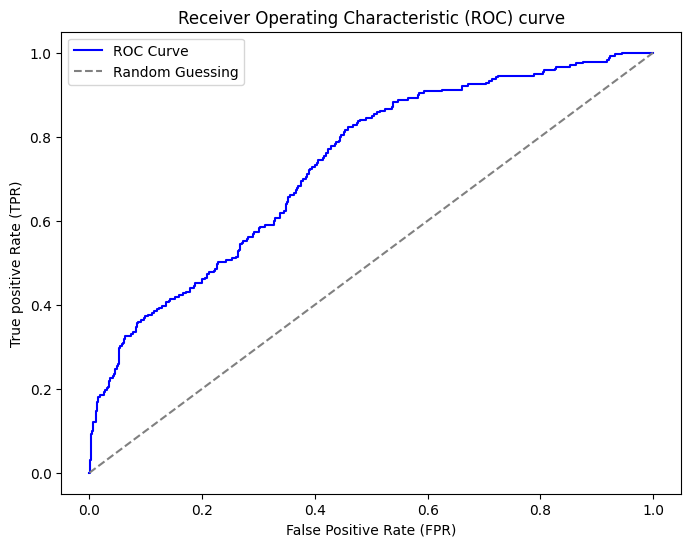

In [ ]:
# now ploting Roc cure for this model
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) curve')
plt.legend()
plt.show()

## 2. DNN

### Importing the libraries for DNN

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

### Data Preprocessing and loading for DNN

In [ ]:
tel=pd.read_csv(r"Telecom.csv")

In [ ]:
# coping the data into another dataframe to work
dataframe = tel

In [ ]:
# viewing the data head and tail
dataframe.head()

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
dataframe.tail()

,CustomerID,PlanTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersons,NumberOfFollowups,PlanPitched,PreferredServiceStar,MaritalStatus,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


In [ ]:
# Checking the data shape
dataframe.shape

(4888, 20)

It has 4888 rows and 20 columns

In [ ]:
# Checking the datatypes of all the attributes
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4662 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4637 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4843 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4862 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4748 non-null   float64
 14  iPhone                  4888 non-null   

The dataset contains null values in the Age, DurationOfPitch, NumberOfFollowups, PreferredServiceStar, NumberOfUpgrades, NumberOfChildren, MonthlyIncome

In [ ]:
#fill missing value of numerical features with mean
telecom_numeric_col=dataframe.select_dtypes(include=['int','float']).columns

In [ ]:
dataframe[telecom_numeric_col]=dataframe[telecom_numeric_col].apply(lambda col:col.fillna(col.mean()))

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              4888 non-null   int64  
 1   PlanTaken               4888 non-null   int64  
 2   Age                     4888 non-null   float64
 3   TypeofContact           4863 non-null   object 
 4   CityTier                4888 non-null   int64  
 5   DurationOfPitch         4888 non-null   float64
 6   Occupation              4888 non-null   object 
 7   Gender                  4888 non-null   object 
 8   NumberOfPersons         4888 non-null   int64  
 9   NumberOfFollowups       4888 non-null   float64
 10  PlanPitched             4888 non-null   object 
 11  PreferredServiceStar    4888 non-null   float64
 12  MaritalStatus           4888 non-null   object 
 13  NumberOfUpgrades        4888 non-null   float64
 14  iPhone                  4888 non-null   

In [ ]:
dataframe.isnull().sum()

CustomerID                 0
PlanTaken                  0
Age                        0
TypeofContact             25
CityTier                   0
DurationOfPitch            0
Occupation                 0
Gender                     0
NumberOfPersons            0
NumberOfFollowups          0
PlanPitched                0
PreferredServiceStar       0
MaritalStatus              0
NumberOfUpgrades           0
iPhone                     0
PitchSatisfactionScore     0
PhoneContract              0
NumberOfChildren           0
Designation                0
MonthlyIncome              0
dtype: int64

In [ ]:
#To handle the null values we are dropping the null value column
dataframe.dropna(subset=['TypeofContact'], inplace=True)

Now there is no null values in the dataset

In [ ]:
dataframe.describe()

,CustomerID,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,iPhone,PitchSatisfactionScore,PhoneContract,NumberOfChildren,MonthlyIncome
count,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000,4863.000000
mean,202449.423196,0.188567,37.661039,1.654329,15.490835,2.908081,3.710648,3.581762,3.238148,0.292412,3.079581,0.620605,1.190286,23619.853491
std,1411.628431,0.391204,9.098037,0.916498,8.319278,0.724762,0.996154,0.795777,1.822154,0.454917,1.366446,0.485286,0.851986,5264.345188
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201229.500000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20479.000000
50%,202456.000000,0.000000,37.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22637.000000
75%,203671.500000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25447.500000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Fixing the data types
* TypeofContact,Occupation, Gender, PlanPitched, MaritalStatus and Designation  are of object type, we can change them to categories.

In [ ]:
dataframe['TypeofContact'] = pd.Categorical(dataframe['TypeofContact'])
dataframe['Gender'] = pd.Categorical(dataframe['Gender'])
dataframe['Occupation'] = pd.Categorical(dataframe['Occupation'])
dataframe['PlanPitched'] = pd.Categorical(dataframe['PlanPitched'])
dataframe['MaritalStatus'] = pd.Categorical(dataframe['MaritalStatus'])

In [ ]:
dataframe.describe(include=['category'])

,TypeofContact,Occupation,Gender,PlanPitched,MaritalStatus
count,4863,4863,4863,4863,4863
unique,2,4,3,5,4
top,Self Enquiry,Salaried,Male,Basic,Married
freq,3444,2363,2901,1832,2325


In [ ]:
cols_category= dataframe.select_dtypes(['category'])

In [ ]:
for i in cols_category.columns:
    print("Unique values in", i, 'are :')
    print(cols_category[i].value_counts())
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2363
Small Business    2064
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2901
Female     1807
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in PlanPitched are :
Basic           1832
Deluxe          1717
Standard         742
Super Deluxe     342
King             230
Name: PlanPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2325
Divorced      944
Single        912
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************


#### Handling the Categorial Features

In [ ]:
# Doing One hot encoding for categorial features
dataframe = pd.get_dummies(dataframe, sparse=True,drop_first=True)

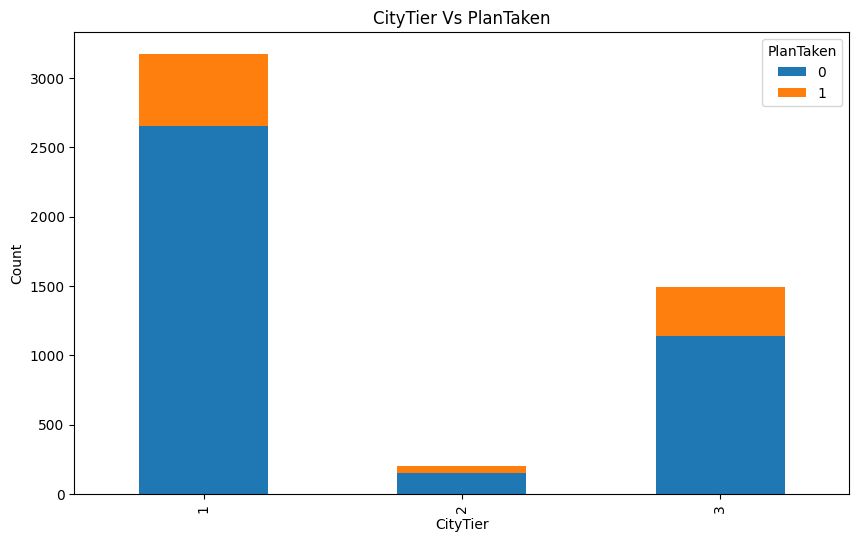

In [ ]:
#stacked bar chart comparing "city tier " with plantaken
city_tier_plan_taken = pd.crosstab(dataframe['CityTier'], dataframe['PlanTaken'])
city_tier_plan_taken.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('CityTier Vs PlanTaken')
plt.xlabel('CityTier')
plt.ylabel('Count')
plt.show()

In [ ]:
dataframe.head()

,PlanTaken,Age,CityTier,DurationOfPitch,NumberOfPersons,NumberOfFollowups,PreferredServiceStar,NumberOfUpgrades,PitchSatisfactionScore,NumberOfChildren,...,Occupation_Small Business,Gender_Female,Gender_Male,PlanPitched_Deluxe,PlanPitched_King,PlanPitched_Standard,PlanPitched_Super Deluxe,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Unmarried
0,1,41.000000,3,6.0,3,3.0,3.0,1.0,2,0.0,...,0,1,0,1,0,0,0,0,1,0
1,0,49.000000,1,14.0,3,4.0,4.0,2.0,3,2.0,...,0,0,1,1,0,0,0,0,0,0
2,1,37.000000,1,8.0,3,4.0,3.0,7.0,3,0.0,...,0,0,1,0,0,0,0,0,1,0
3,0,33.000000,1,9.0,2,3.0,3.0,2.0,5,1.0,...,0,1,0,0,0,0,0,0,0,0
4,0,37.622265,1,8.0,2,3.0,4.0,1.0,5,0.0,...,1,0,1,0,0,0,0,0,0,0


#### Removing the unwanted column from dataframe

In [ ]:
dataframe.drop('Designation',axis='columns', inplace=True)
dataframe.drop('CustomerID',axis='columns', inplace=True)
dataframe.drop('iPhone',axis='columns', inplace=True)
dataframe.drop('PhoneContract',axis='columns', inplace=True)

### Data Visulization and analysis for DNN

In [ ]:
#univariative Analysis
import matplotlib.pyplot as plt
import seaborn as sns

def histogram_boxplot(data1, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={'height_ratios': (0.50, 1.0)},
        figsize=figsize,
    )
    sns.boxplot(
        data=data1, x=feature, ax=ax_box2, showmeans=True, color="pink"
    )
    sns.histplot(
        data=data1, x=feature, ax=ax_hist2, bins=bins, palette="blue"
    ) if bins else sns.histplot(
        data=data1, x=feature, kde=kde, ax=ax_hist2
    )
    ax_hist2.axvline(
        data1[feature].mean(), color="red", linestyle="--"
    )
    ax_hist2.axvline(
        data1[feature].median(), color="black", linestyle="--"
    )


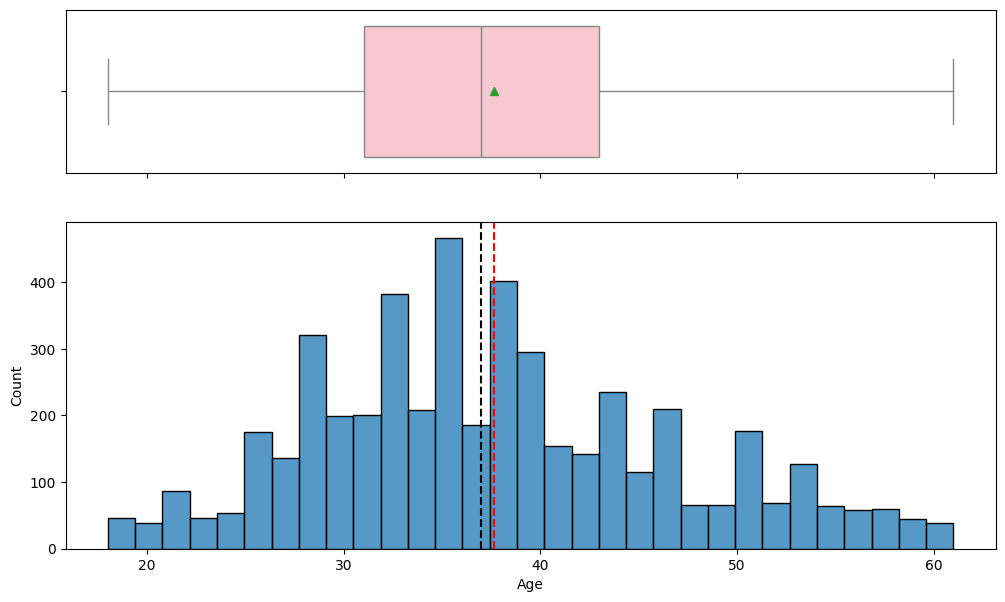

In [ ]:
#observations on age
histogram_boxplot(dataframe,'Age' )

#### This one is right skewed and on average the members age is 36. There are no outliers.

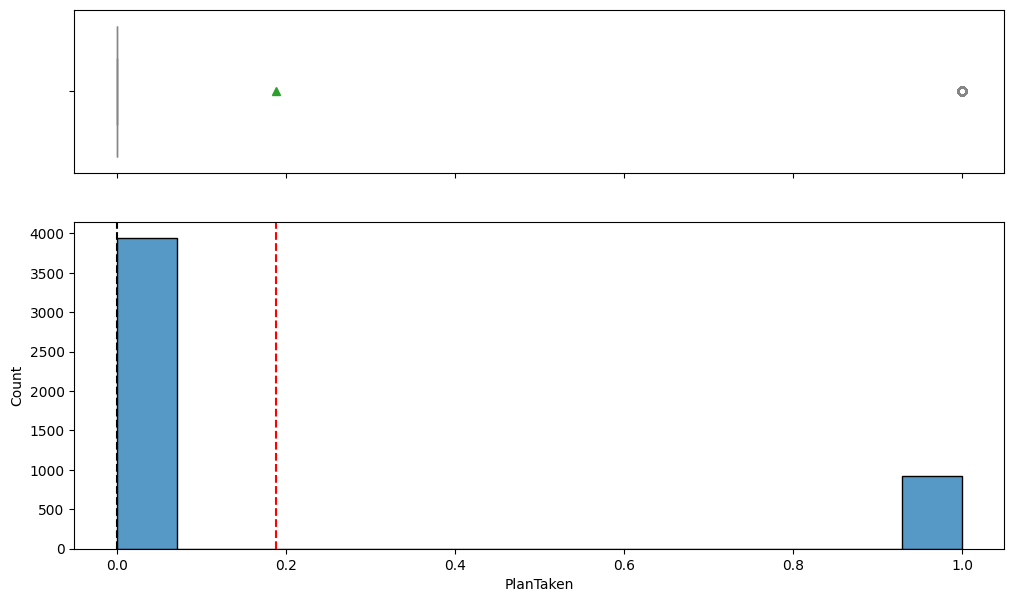

In [ ]:
#observation on PlanTaken
histogram_boxplot(dataframe, 'PlanTaken')

#### Most of the members in this are taken the paln and there are two outliers

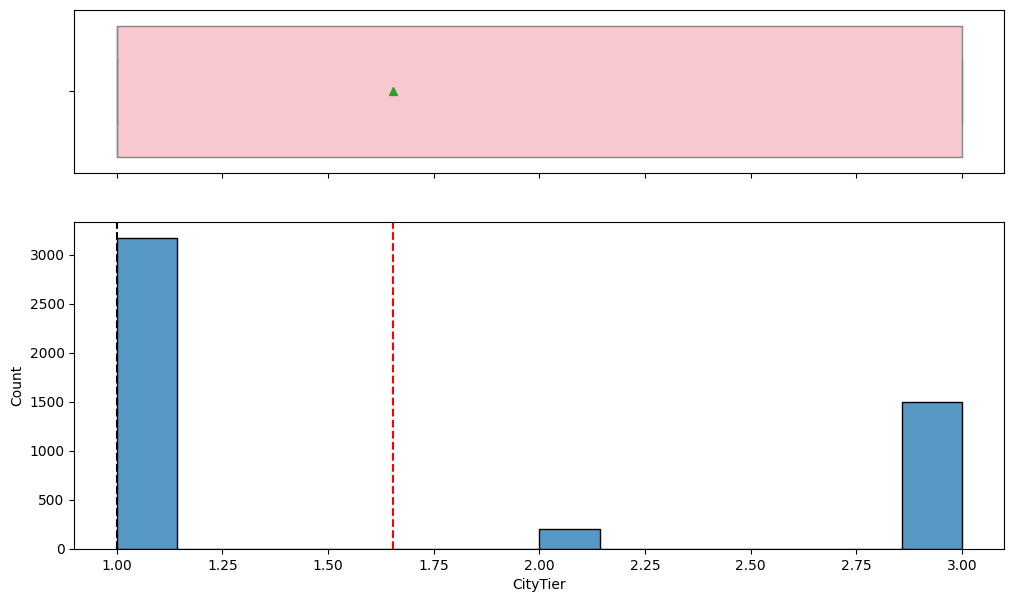

In [ ]:
#observation on CityTier
histogram_boxplot(dataframe,'CityTier')

#### This is rightskewed and most of the members are fron tier1.

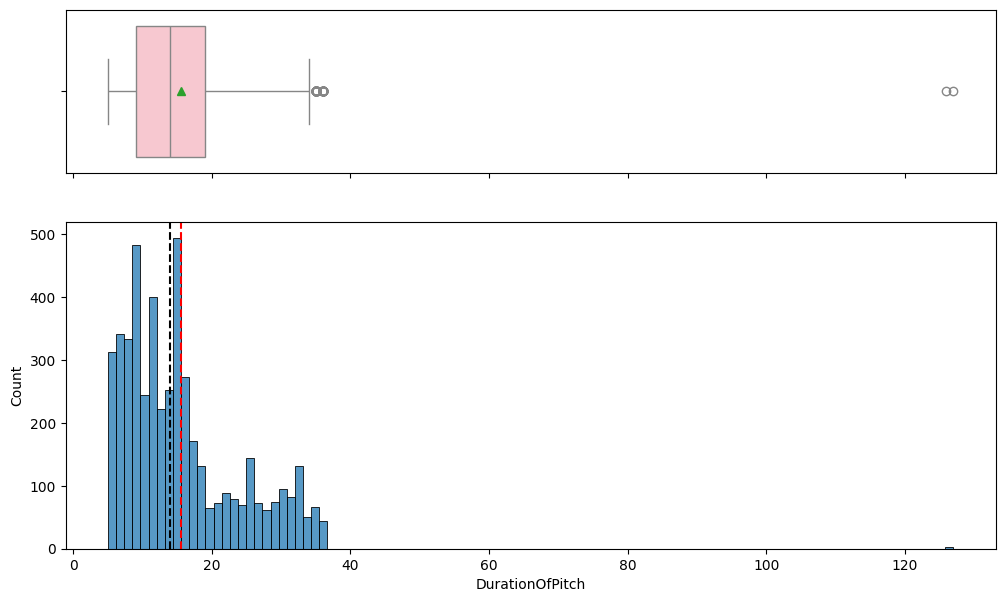

In [ ]:
#observation on durationofpitch
histogram_boxplot(dataframe, 'DurationOfPitch')

#### This is right skewed and one otlier is there. The average duration pitch is 700.

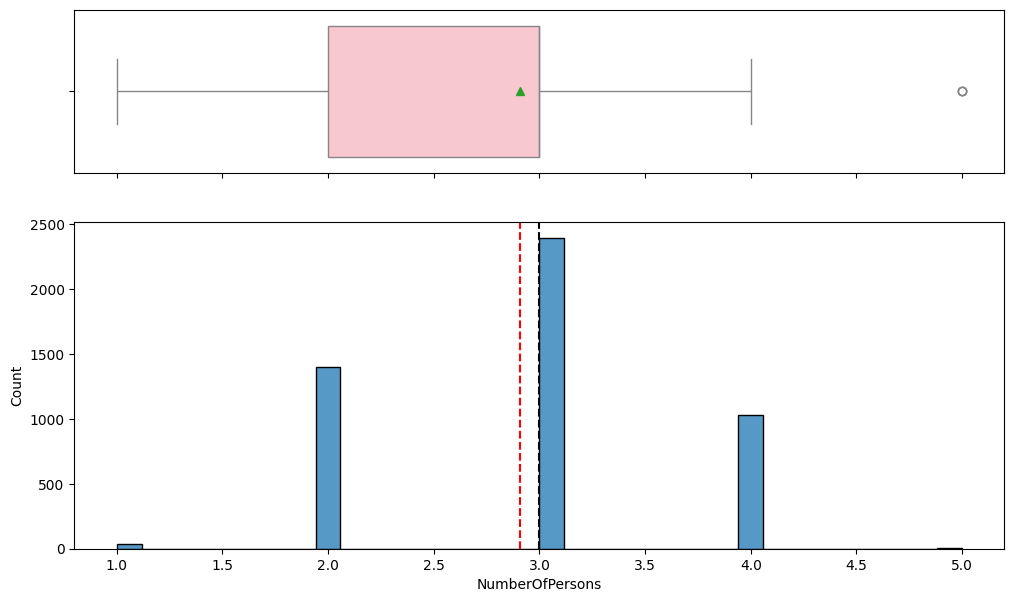

In [ ]:
#observation on NumberOfPersons
histogram_boxplot(dataframe, 'NumberOfPersons')

#### This one is left skewed and one oulier is there.

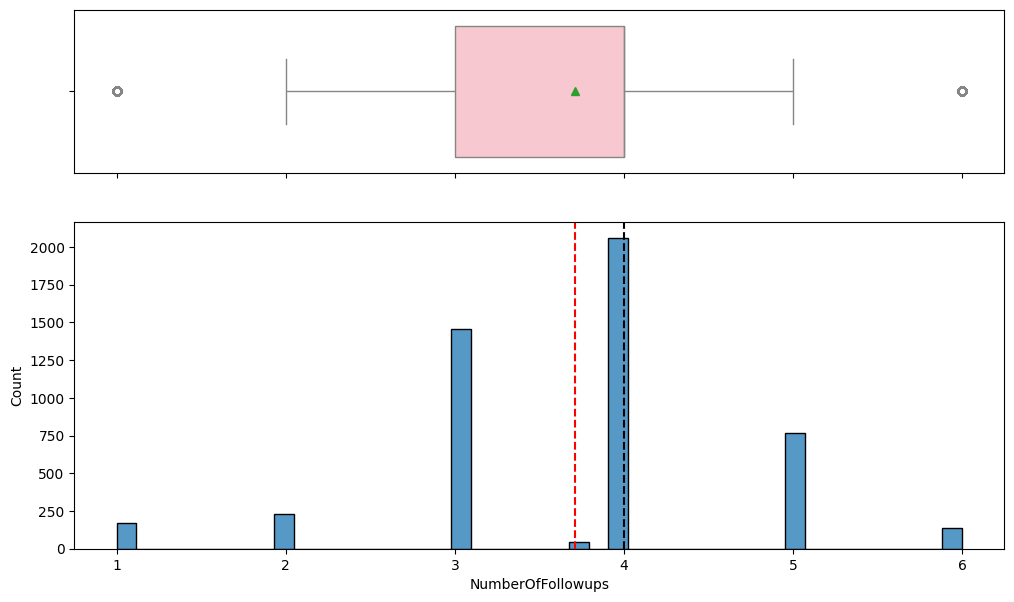

In [ ]:
#observation on numberoffollowups
histogram_boxplot(dataframe, 'NumberOfFollowups')

#### Numberoffollowups are left skewed and 2000 members came for 4 followups. There are two ouliers

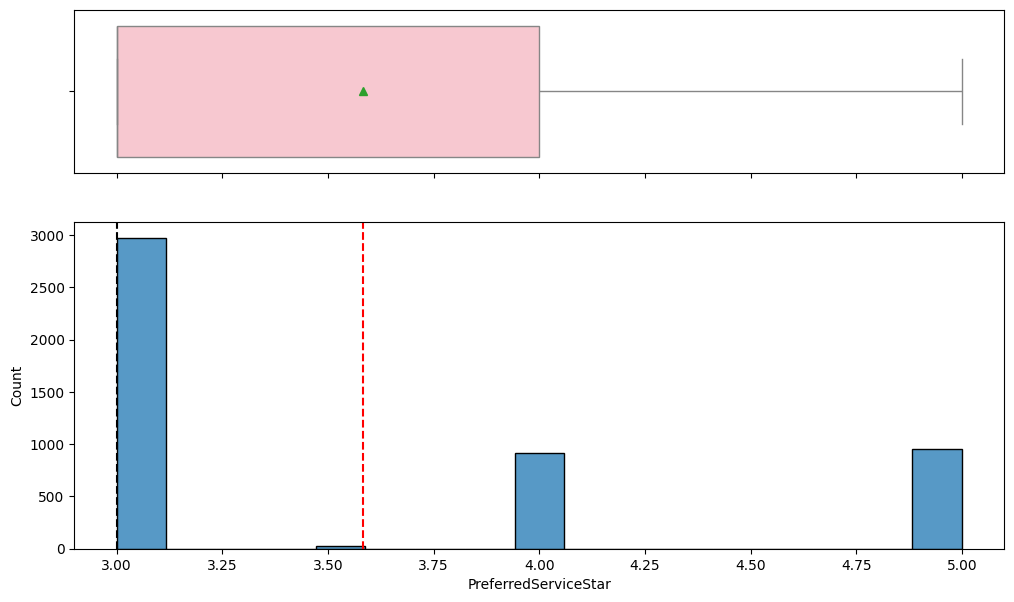

In [ ]:
#observation on PreferredServiceStar
histogram_boxplot(dataframe, 'PreferredServiceStar')

#### Nearly 2900 members gave us 3 star rating and it is right skewed.

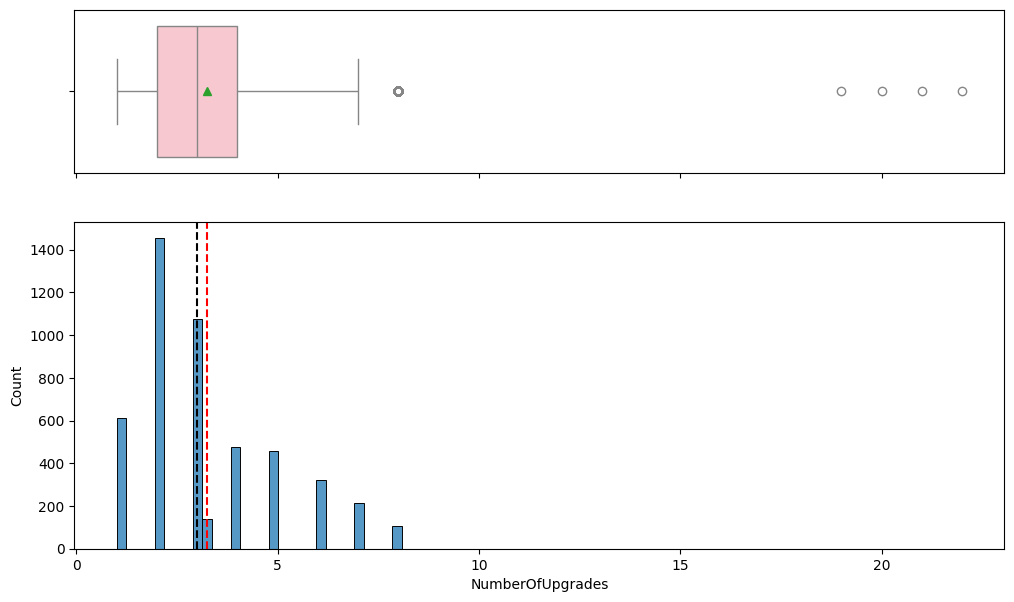

In [ ]:
#observation on NumberOfUpgrages
histogram_boxplot(dataframe, 'NumberOfUpgrades')

#### On average number of upgrades customers got are 5 abd there are 5 outliers.

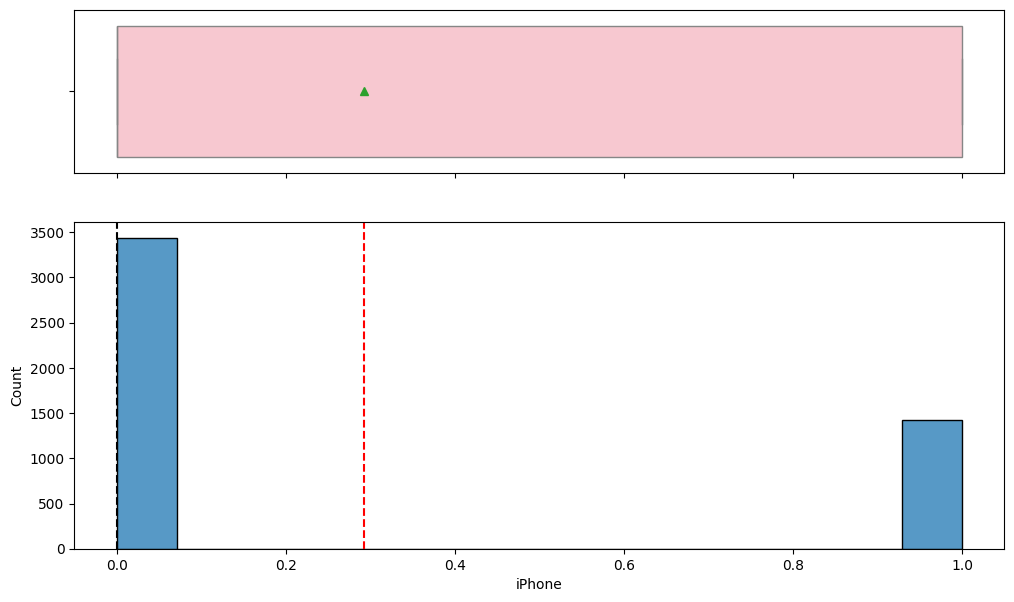

In [ ]:
#observation on Iphone
histogram_boxplot(dataframe, 'iPhone')

#### In this around 3400 members does not iphone and 1300 membesr have the i phone. It is right skewed.

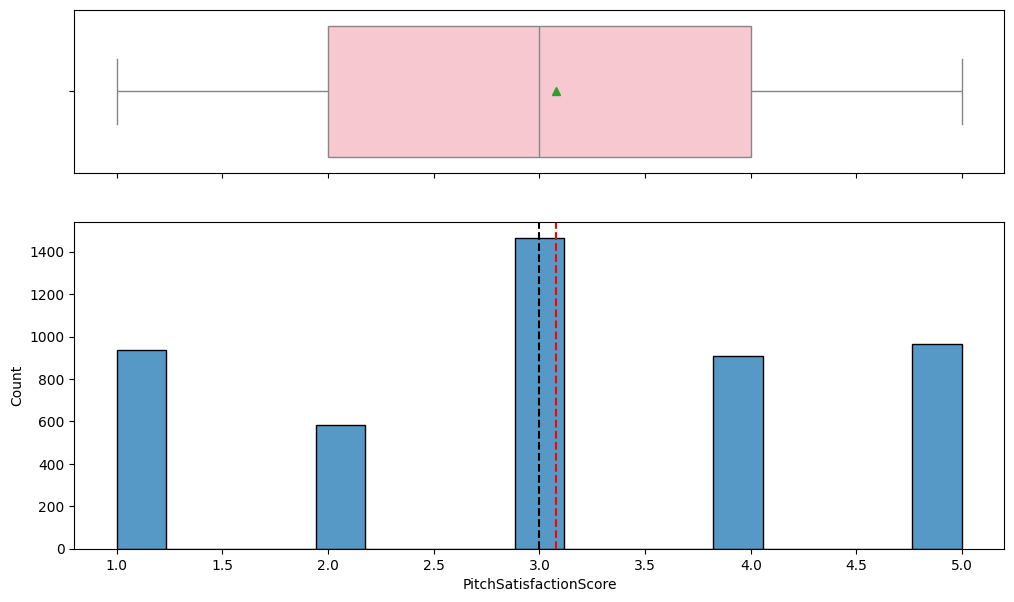

In [ ]:
#observation on pitchsatisfactionscore
histogram_boxplot(dataframe, 'PitchSatisfactionScore')

#### This pitchsatisfationscore is also right skewed and the average lies between 3

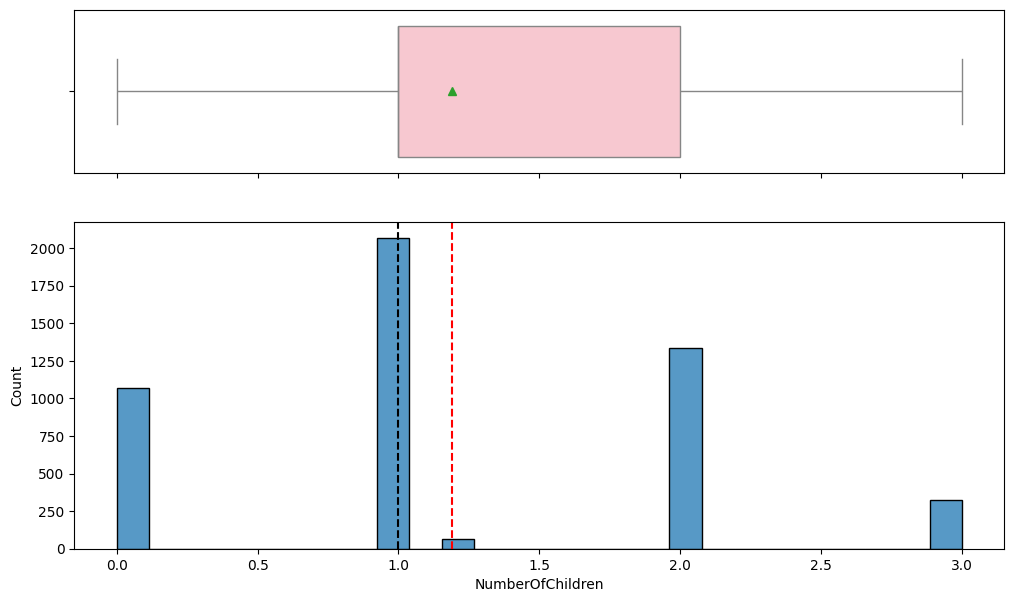

In [ ]:
#observation on number of children
histogram_boxplot(dataframe, "NumberOfChildren")

#### Observations on Numberofchildren is right skewed

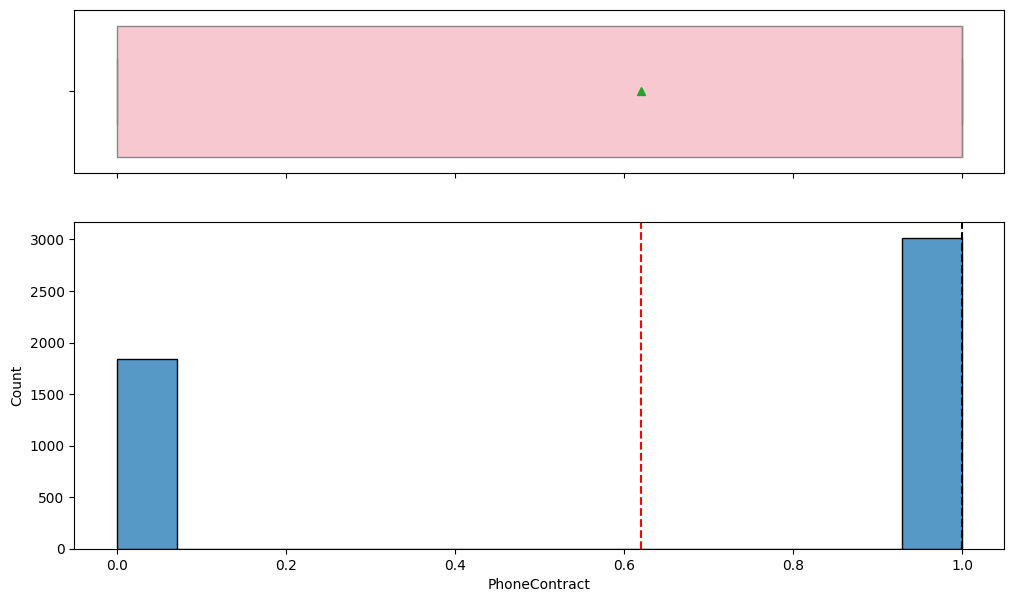

In [ ]:
#observation on PhoneContract
histogram_boxplot(dataframe, 'PhoneContract')

#### From the above observations on phone contract is
* 1800 members have zero phone contracts
* 2900 members habe atleat 1 phone contract

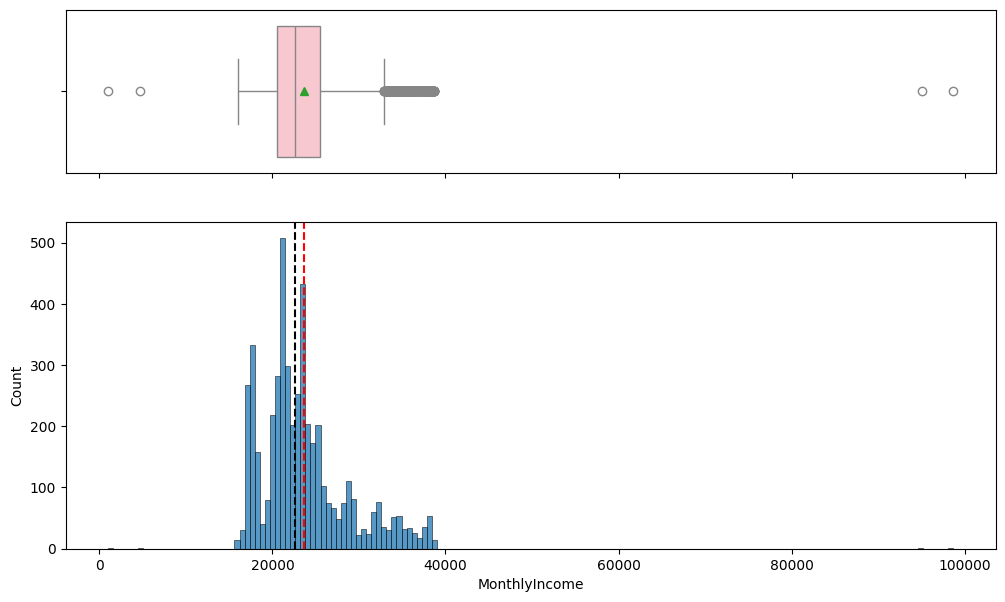

In [ ]:
#observation on Monthly Income
histogram_boxplot(dataframe, 'MonthlyIncome')

#### From the observation of the above graph
* On average employee average income lies between 20000 to 21000 and monthly is right skewed

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'CustomerID'),
  Text(0, 1.5, 'PlanTaken'),
  Text(0, 2.5, 'Age'),
  Text(0, 3.5, 'CityTier'),
  Text(0, 4.5, 'DurationOfPitch'),
  Text(0, 5.5, 'NumberOfPersons'),
  Text(0, 6.5, 'NumberOfFollowups'),
  Text(0, 7.5, 'PreferredServiceStar'),
  Text(0, 8.5, 'NumberOfUpgrades'),
  Text(0, 9.5, 'iPhone'),
  Text(0, 10.5, 'PitchSatisfactionScore'),
  Text(0, 11.5, 'PhoneContract'),
  Text(0, 12.5, 'NumberOfChildren'),
  Text(0, 13.5, 'MonthlyIncome')])

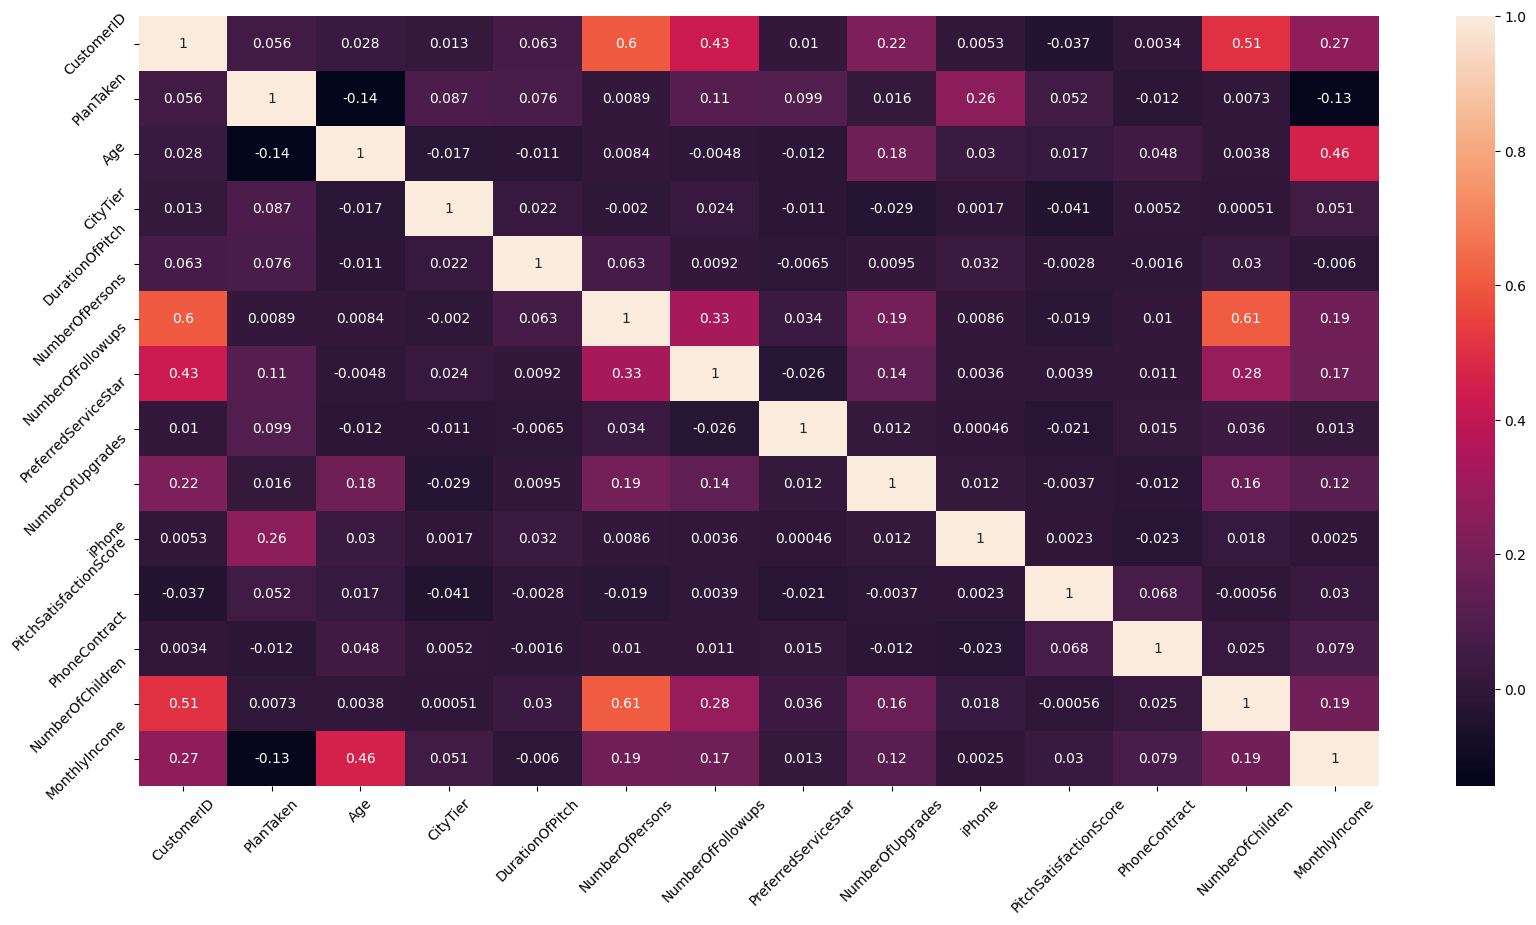

In [ ]:
#Bivariative Analysis
numeric_data = dataframe.select_dtypes(include='number')
plt.figure(figsize=(20, 10))
sns.heatmap(numeric_data.corr(), annot=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

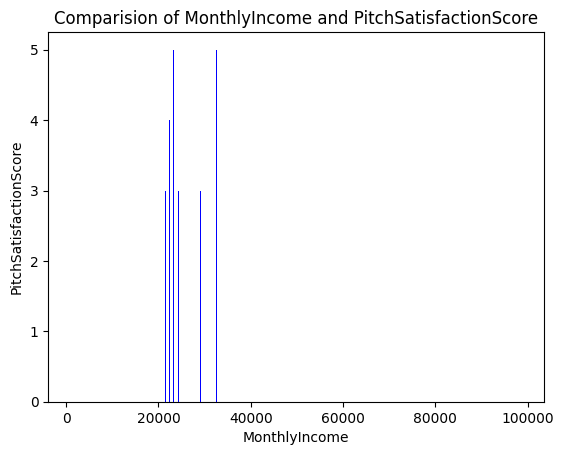

In [ ]:
#Barchart
categories = dataframe['MonthlyIncome']
values=dataframe['PitchSatisfactionScore']
plt.bar(categories, values, color='blue')
plt.xlabel('MonthlyIncome')
plt.ylabel('PitchSatisfactionScore')
plt.title("Comparision of MonthlyIncome and PitchSatisfactionScore")
plt.show()

### Model Building for DNN

To Handle significant imbalance in the distribution of the target classes, we are using stratified sampling to ensure that  class frequencies are approximately preserved in train and test sets.

In [ ]:
y = dataframe['PlanTaken']
X = dataframe.drop(['PlanTaken'],axis=1)

In [ ]:
# Splitting dataframe into training and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(3404, 23) (1459, 23)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
y.value_counts(1)

0    0.811433
1    0.188567
Name: PlanTaken, dtype: float64

In [ ]:
y_train.value_counts(1)

0    0.811398
1    0.188602
Name: PlanTaken, dtype: float64

In [ ]:
y_test.value_counts(1)

0    0.811515
1    0.188485
Name: PlanTaken, dtype: float64

### Model Evaluation for DNN

In [ ]:
# creating a function to compute the classification matrics for the classification model
def model_classification_matrics(classifier, test_x, test_y):
    """
    Fn to calculate the confusion matrix

    classifier: actual model classifier
    test_x: independent variables
    test_y: dependent variable
    """

    # predicting the test data
    pred = (classifier.predict(X_test) > 0.5).astype(int)

    accuracy = accuracy_score(test_y, pred)  # calculating Accuracy
    recall = recall_score(test_y, pred)  # Calculating Recall
    precision = precision_score(test_y, pred)  # Calculating Precision
    f1 = f1_score(test_y, pred)  # Calculating  F1-score


    # creating a dataframe of metrics
    metrix_data = pd.DataFrame(
        {
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return metrix_data

In [ ]:
# creating a function to compute the confusion matrix matrics for the classification model
def confusion_matrix_fun(classifier, test_x, test_y):
    """
    To plot the confusion_matrix with percentages

    classifier: actual model classifier
    test_x: independent variables
    test_y: dependent variable
    """
    pred = (classifier.predict(X_test) > 0.5).astype(int)

    confusion_m = confusion_matrix(test_y, pred)
    # Plot confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(test_y), yticklabels=np.unique(test_y))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculating the AUC Score
    auc_score = roc_auc_score(y_test, pred)
    print(f"AUC Score: {auc_score}")

    #Plotting the ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, color='blue', label='ROC Curve')
    plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Random Guessing')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()

In [ ]:
#Network paramters
batch_size = 130
dropout = 0.45

In [ ]:
input_size = X_train.shape[1]
input_size

23

In [ ]:
#Model with 5 layer with Relu function
model = Sequential()
model.add(Dense(2048, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(512, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(128,input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(32,input_dim=input_size))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
#Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 2048)              49152     
                                                                 
 activation_135 (Activation  (None, 2048)              0         
 )                                                               
                                                                 
 dense_136 (Dense)           (None, 512)               1049088   
                                                                 
 activation_136 (Activation  (None, 512)               0         
 )                                                               
                                                                 
 dense_137 (Dense)           (None, 128)               65664     
                                                                 
 activation_137 (Activation  (None, 128)             

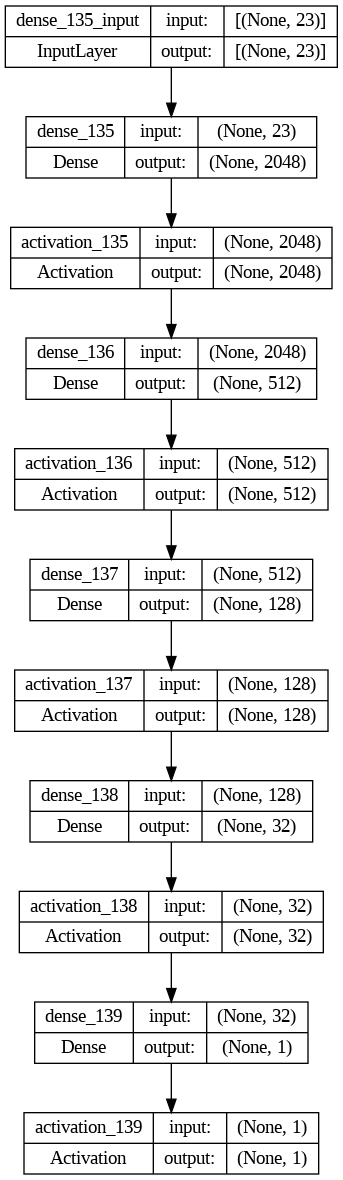

In [ ]:
plot_model(model,to_file='model_1.png',show_shapes=True)

In [ ]:
#Training the model
model.fit(X_train,y_train,epochs=10,batch_size=batch_size)

Epoch 1/10
27/27 [==============================] - 3s 50ms/step - loss: 0.4525 - accuracy: 0.8114
Epoch 2/10
27/27 [==============================] - 1s 35ms/step - loss: 0.3948 - accuracy: 0.8334
Epoch 3/10
27/27 [==============================] - 1s 35ms/step - loss: 0.3684 - accuracy: 0.8458
Epoch 4/10
27/27 [==============================] - 1s 34ms/step - loss: 0.3379 - accuracy: 0.8581
Epoch 5/10
27/27 [==============================] - 1s 33ms/step - loss: 0.3046 - accuracy: 0.8713
Epoch 6/10
27/27 [==============================] - 2s 64ms/step - loss: 0.2640 - accuracy: 0.8884
Epoch 7/10
27/27 [==============================] - 1s 39ms/step - loss: 0.2267 - accuracy: 0.9063
Epoch 8/10
27/27 [==============================] - 1s 36ms/step - loss: 0.2284 - accuracy: 0.9072
Epoch 9/10
27/27 [==============================] - 1s 36ms/step - loss: 0.1920 - accuracy: 0.9201
Epoch 10/10
27/27 [==============================] - 1s 36ms/step - loss: 0.1387 - accuracy: 0.9439


In [ ]:
#Calculating the accuracy on test data
loss, acc = model.evaluate(X_test,y_test,batch_size=batch_size)
print("Test Accuracy:-> {}".format(acc))

12/12 [==============================] - 0s 14ms/step - loss: 0.2385 - accuracy: 0.8992
Test Accuracy:-> 0.8992460370063782


### Evaluation Metrics :



In [ ]:
#Method for different classification models
model_perf = model_classification_matrics(model,X_test,y_test)
model_perf

46/46 [==============================] - 0s 7ms/step


,Accuracy,Recall,Precision,F1
0,0.899246,0.596364,0.82,0.690526


46/46 [==============================] - 0s 8ms/step


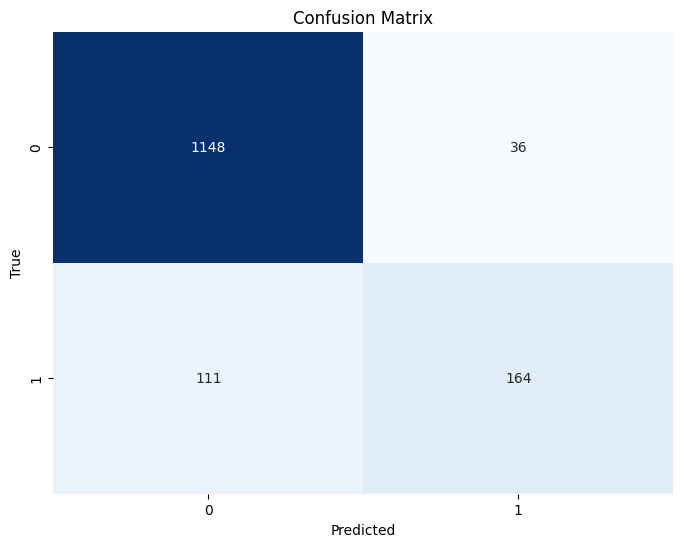

AUC Score: 0.7829791154791154


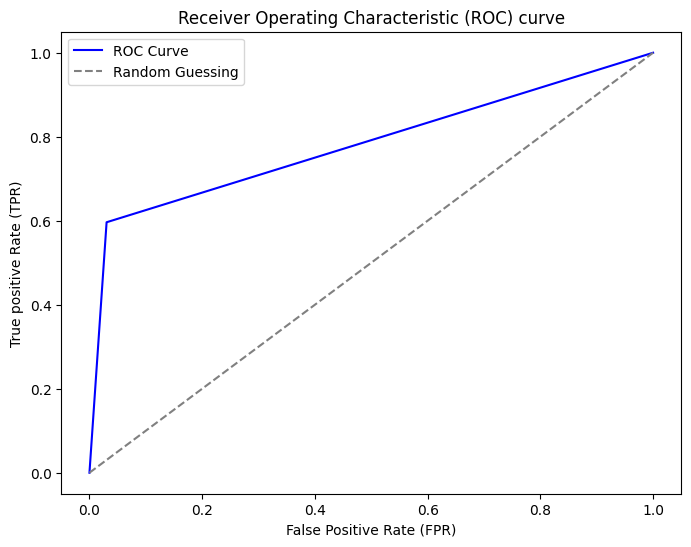

In [ ]:
#Confusion matrix method
confusion_matrix_fun(model,X_test,y_test)

### Model Tuning For DNN

#### 1. Early Stopping and Taking the validation data as 30%

In [ ]:
#Model with 5 layer with Relu function and dropout after each layer
model_2 = Sequential()
model_2.add(Dense(2048, input_dim=input_size))
model_2.add(Activation('relu'))
model_2.add(Dropout(dropout))
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(dropout))
model_2.add(Dense(128,input_dim=input_size))
model_2.add(Activation('relu'))
model_2.add(Dropout(dropout))
model_2.add(Dense(32,input_dim=input_size))
model_2.add(Activation('relu'))
model_2.add(Dropout(dropout))
model_2.add(Dense(1))
model_2.add(Activation('sigmoid'))


# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Compile the model again
model_2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Model summary
model_2.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 2048)              49152     
                                                                 
 activation_140 (Activation  (None, 2048)              0         
 )                                                               
                                                                 
 dropout_44 (Dropout)        (None, 2048)              0         
                                                                 
 dense_141 (Dense)           (None, 512)               1049088   
                                                                 
 activation_141 (Activation  (None, 512)               0         
 )                                                               
                                                                 
 dropout_45 (Dropout)        (None, 512)             

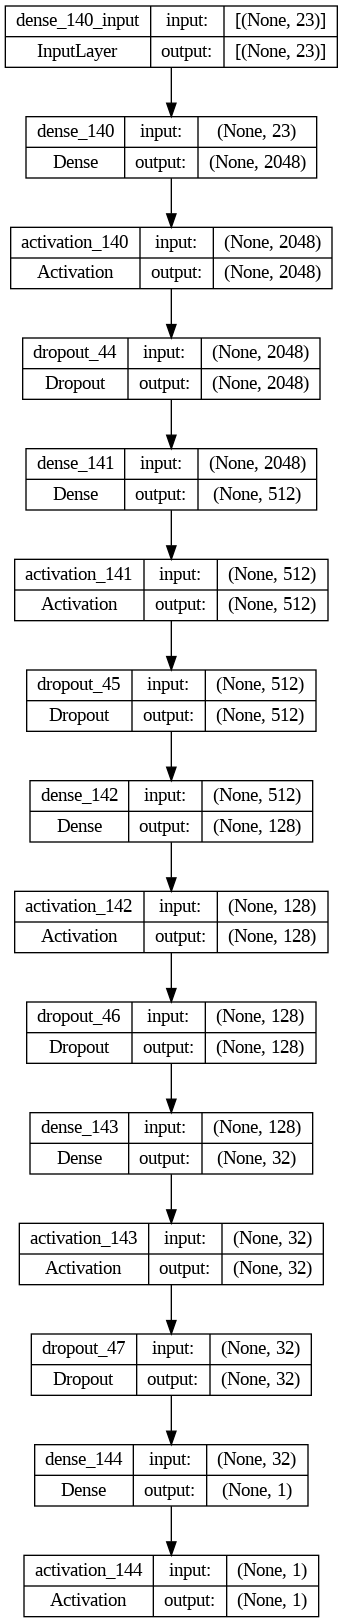

In [ ]:
plot_model(model_2,to_file='model_2.png',show_shapes=True)

In [ ]:
#Train the model with early Stopping and validation data is 30%
model_2.fit(X_train,y_train,epochs=10,batch_size=batch_size,validation_split=0.3, callbacks=[early_stopping])

Epoch 1/10
19/19 [==============================] - 2s 60ms/step - loss: 0.5213 - accuracy: 0.8010 - val_loss: 0.4408 - val_accuracy: 0.8072
Epoch 2/10
19/19 [==============================] - 1s 48ms/step - loss: 0.4667 - accuracy: 0.8140 - val_loss: 0.4262 - val_accuracy: 0.8092
Epoch 3/10
19/19 [==============================] - 1s 50ms/step - loss: 0.4513 - accuracy: 0.8132 - val_loss: 0.4110 - val_accuracy: 0.8131
Epoch 4/10
19/19 [==============================] - 1s 50ms/step - loss: 0.4339 - accuracy: 0.8149 - val_loss: 0.4102 - val_accuracy: 0.8249
Epoch 5/10
19/19 [==============================] - 1s 50ms/step - loss: 0.4305 - accuracy: 0.8207 - val_loss: 0.4085 - val_accuracy: 0.8239
Epoch 6/10
19/19 [==============================] - 1s 49ms/step - loss: 0.4132 - accuracy: 0.8212 - val_loss: 0.3954 - val_accuracy: 0.8307
Epoch 7/10
19/19 [==============================] - 1s 47ms/step - loss: 0.3948 - accuracy: 0.8325 - val_loss: 0.3875 - val_accuracy: 0.8346
Epoch 8/10
19

In [ ]:
#Calculating the accuracy on test data
loss, acc = model_2.evaluate(X_test,y_test,batch_size=batch_size)
print("Test Accuracy:-> {}".format(acc))

12/12 [==============================] - 0s 9ms/step - loss: 0.3790 - accuracy: 0.8382
Test Accuracy:-> 0.8382453918457031


In [ ]:
#Method for different classification models
model_perf = model_classification_matrics(model_2,X_test,y_test)
model_perf

46/46 [==============================] - 0s 5ms/step


,Accuracy,Recall,Precision,F1
0,0.838245,0.389091,0.611429,0.475556


46/46 [==============================] - 0s 5ms/step


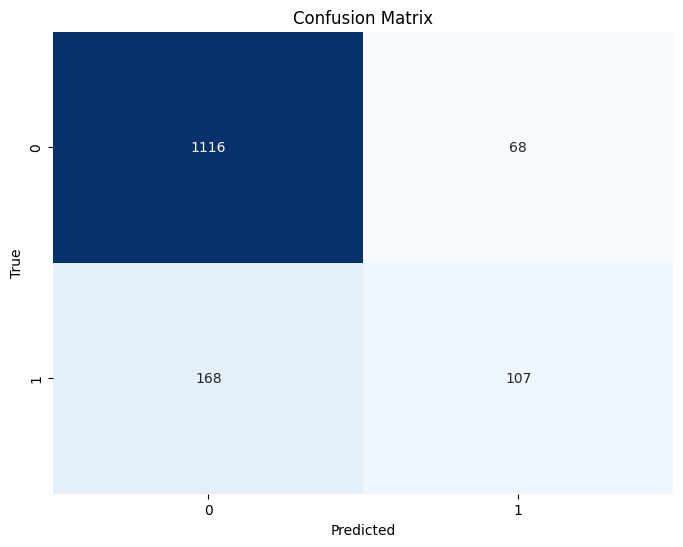

AUC Score: 0.6658292383292383


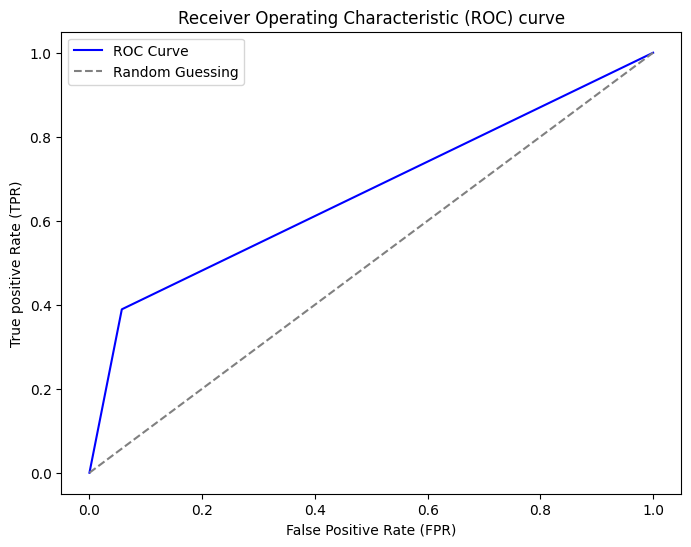

In [ ]:
#Confusion matrix method calling
confusion_matrix_fun(model_2,X_test,y_test)

#### 2. With Weight initialization using HE Initialization

In [ ]:
from keras import initializers

#Initializing the He normalization for weight initialization
init_1 = initializers.HeNormal()
init_3 = initializers.HeNormal()
init_4 = initializers.HeNormal()
init_5 = initializers.HeNormal()


#Model with 5 layer with Relu function and dropout after each layer
model_3 = Sequential()
model_3.add(Dense(2048, input_dim=input_size, kernel_initializer=init_1))
model_3.add(Activation('relu'))
model_3.add(Dropout(dropout))
model_3.add(Dense(512, kernel_initializer=init_3))
model_3.add(Activation('relu'))
model_3.add(Dropout(dropout))
model_3.add(Dense(128,input_dim=input_size, kernel_initializer=init_4))
model_3.add(Activation('relu'))
model_3.add(Dropout(dropout))
model_3.add(Dense(32,input_dim=input_size, kernel_initializer=init_5))
model_3.add(Activation('relu'))
model_3.add(Dropout(dropout))
model_3.add(Dense(1))
model_3.add(Activation('sigmoid'))

In [ ]:
# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#Compile the model again
model_3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

#Model summary
model_3.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 2048)              49152     
                                                                 
 activation_145 (Activation  (None, 2048)              0         
 )                                                               
                                                                 
 dropout_48 (Dropout)        (None, 2048)              0         
                                                                 
 dense_146 (Dense)           (None, 512)               1049088   
                                                                 
 activation_146 (Activation  (None, 512)               0         
 )                                                               
                                                                 
 dropout_49 (Dropout)        (None, 512)             

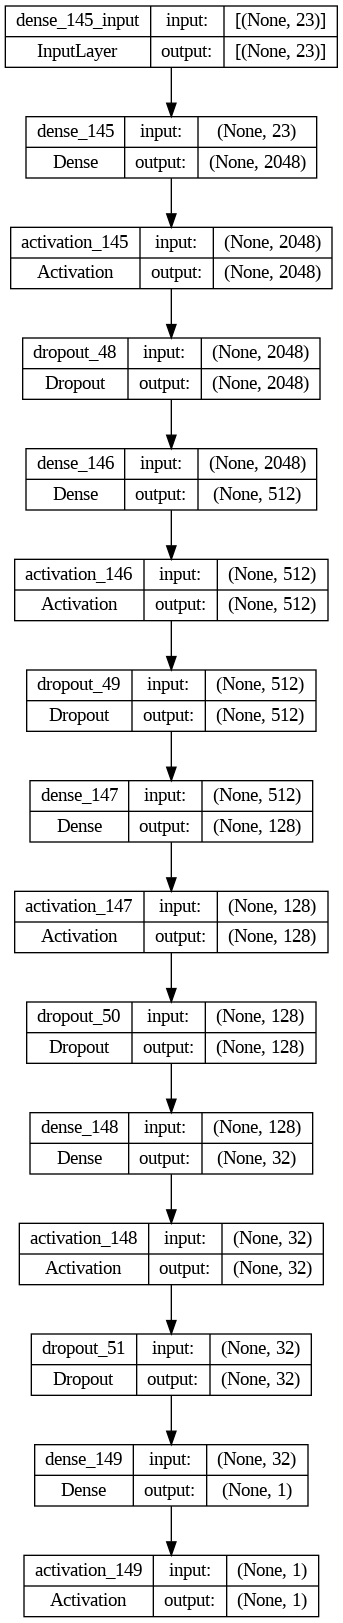

In [ ]:
plot_model(model_3,to_file='model_3.png',show_shapes=True)

In [ ]:
#Train the model
model_3.fit(X_train,y_train,epochs=10,batch_size=batch_size)

Epoch 1/10
27/27 [==============================] - 2s 40ms/step - loss: 0.7623 - accuracy: 0.7385
Epoch 2/10
27/27 [==============================] - 1s 40ms/step - loss: 0.5695 - accuracy: 0.7738
Epoch 3/10
27/27 [==============================] - 1s 40ms/step - loss: 0.5396 - accuracy: 0.7855
Epoch 4/10
27/27 [==============================] - 1s 39ms/step - loss: 0.5118 - accuracy: 0.7976
Epoch 5/10
27/27 [==============================] - 1s 38ms/step - loss: 0.4798 - accuracy: 0.8043
Epoch 6/10
27/27 [==============================] - 1s 50ms/step - loss: 0.4874 - accuracy: 0.8002
Epoch 7/10
27/27 [==============================] - 2s 62ms/step - loss: 0.4705 - accuracy: 0.8120
Epoch 8/10
27/27 [==============================] - 1s 38ms/step - loss: 0.4683 - accuracy: 0.8079
Epoch 9/10
27/27 [==============================] - 1s 38ms/step - loss: 0.4564 - accuracy: 0.8176
Epoch 10/10
27/27 [==============================] - 1s 41ms/step - loss: 0.4441 - accuracy: 0.8158


In [ ]:
#Calculating the accuracy on test data
loss, acc = model_3.evaluate(X_test,y_test,batch_size=batch_size)
print("Test Accuracy:-> {}".format(acc))

12/12 [==============================] - 0s 9ms/step - loss: 0.4319 - accuracy: 0.8197
Test Accuracy:-> 0.8197395205497742


In [ ]:
#Method for different classification models
model_perf = model_classification_matrics(model_3,X_test,y_test)
model_perf

46/46 [==============================] - 0s 5ms/step


,Accuracy,Recall,Precision,F1
0,0.81974,0.065455,0.75,0.120401


46/46 [==============================] - 0s 5ms/step


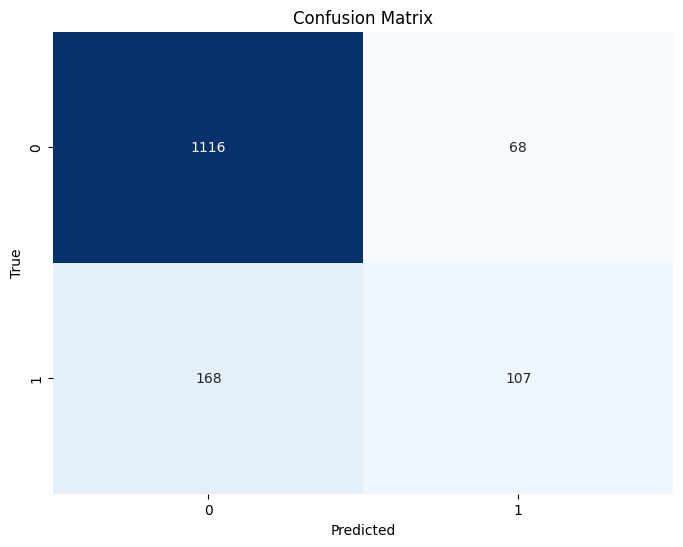

AUC Score: 0.6658292383292383


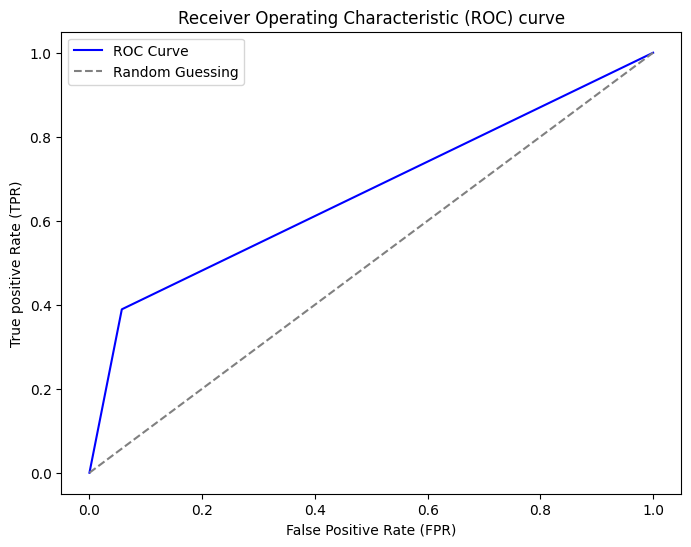

In [ ]:
#Confusion matrix method calling
confusion_matrix_fun(model_2,X_test,y_test)

### Handling the Class imbalance with Bagging Technique

* created 5 models with with samples
* predicted the values and then mean is taken by averaging

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import resample

# Number of models in the ensemble
num_models = 5
models = []

for i in range(num_models):
    # Create a sample (with replacement) to handle class imbalance
    X_resampled, y_resampled = resample(X_train, y_train, replace=True)

    model = Sequential()
    model.add(Dense(2048, input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(128,input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dense(32,input_dim=input_size))
    model.add(Activation('relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))


    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # Train the model on the  sample
    model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, verbose=0)

    # Add the trained model to the ensemble
    models.append(model)

In [ ]:
#Created the np array with zeros
predictions = np.zeros((len(X_test), num_models))

for i, classifier in enumerate(models):
    #Change the array to 1D
    x = classifier.predict(X_test).flatten()
    predictions[:, i] = x

46/46 [==============================] - 1s 9ms/step


In [ ]:
# Aggregate prediction
ensemble_prediction = np.mean(predictions, axis=1)

# Convert prediction to binary class label
ensemble_labels = np.round(ensemble_prediction)

# Evaluate the performance ensemble
accuracy = accuracy_score(y_test, ensemble_labels)
print(f'Ensemble Accuracy:-> {accuracy}')

Ensemble Accuracy:-> 0.9074708704592186
